In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
PATH_TO_GRAPH = r'models/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'foreign_graph.pb'
PATH_TO_LABELS = r'data/label_map.pbtxt'
NUM_CLASSES = 13

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'GreenLeft'}, 3: {'id': 3, 'name': 'GreenRight'}, 4: {'id': 4, 'name': 'GreenStraight'}, 5: {'id': 5, 'name': 'GreenStraightLeft'}, 6: {'id': 6, 'name': 'GreenStraightRight'}, 7: {'id': 7, 'name': 'Red'}, 8: {'id': 8, 'name': 'RedLeft'}, 9: {'id': 9, 'name': 'RedRight'}, 10: {'id': 10, 'name': 'RedStraight'}, 11: {'id': 11, 'name': 'RedStraightLeft'}, 12: {'id': 12, 'name': 'Yellow'}, 13: {'id': 13, 'name': 'off'}}


In [6]:
PATH_TO_IMGS = r'data/dataset_test_rgb/rgb/test/'
# PATH_TO_IMGS = r'data/udacity_testarea_rgb/'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.png'))
IMAGE_SIZE = (12, 8)
random.shuffle(TEST_IMGS)

SCORES
[[0.9459163  0.9447602  0.9380471  0.93774265 0.9123407  0.9066803
  0.904779   0.9000377  0.89721406 0.896525   0.89418423 0.89328736
  0.8865046  0.8784499  0.87824607 0.8777416  0.87072736 0.86826587
  0.8650098  0.86398274 0.86395    0.86136925 0.8603972  0.859966
  0.85819465 0.85715926 0.85629445 0.85561657 0.8508277  0.84942716
  0.8479708  0.845893   0.8420578  0.8417806  0.8412665  0.8386192
  0.8384436  0.8363124  0.83502954 0.83494866 0.8344767  0.8307497
  0.83045906 0.8299828  0.8299253  0.82944393 0.8285697  0.8280454
  0.8278508  0.82514644 0.82422084 0.8238161  0.8229237  0.8219123
  0.8216481  0.8215155  0.81863797 0.81813353 0.81694555 0.8163407
  0.8163164  0.81307477 0.81239396 0.81126845 0.81112504 0.8110431
  0.80945283 0.80931467 0.8080733  0.8068774  0.806862   0.8065624
  0.8048453  0.80439025 0.8043604  0.8029929  0.80258805 0.80244327
  0.80148864 0.8009892  0.8009411  0.8008164  0.7998759  0.7991857
  0.79905033 0.7984059  0.798215   0.79751223 0.7961

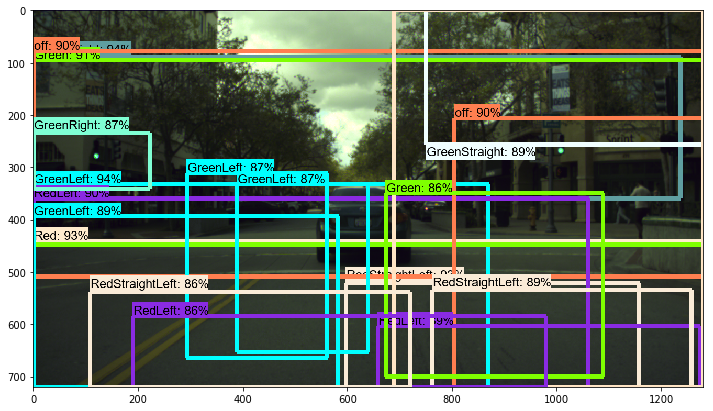

SCORES
[[0.9571345  0.9540994  0.89413476 0.89115    0.89057684 0.87855697
  0.86754566 0.8656197  0.8587103  0.85738355 0.8547065  0.85413414
  0.84903556 0.8425094  0.84118855 0.8382866  0.83791816 0.83652747
  0.8361642  0.83518517 0.83242786 0.83092475 0.8302797  0.8287471
  0.82800525 0.8259979  0.82488924 0.82342577 0.82279605 0.82248634
  0.8214192  0.8208122  0.8203058  0.8202289  0.8176703  0.81698674
  0.81448823 0.8141881  0.81302094 0.8125213  0.81190836 0.8119025
  0.811518   0.8111236  0.81035054 0.80982846 0.8096459  0.80956304
  0.8080774  0.8079439  0.8074075  0.8069338  0.8066915  0.8063995
  0.8049177  0.80470043 0.8041413  0.80390036 0.802227   0.80214673
  0.80056787 0.80006343 0.79746324 0.7965465  0.7935094  0.79345554
  0.7913766  0.7908812  0.7908056  0.7907656  0.790466   0.78986514
  0.78977054 0.78840566 0.78771347 0.78718156 0.78689206 0.7867147
  0.7865931  0.78581184 0.78526294 0.7849065  0.78370315 0.78188354
  0.78182787 0.78033125 0.7796856  0.77917475

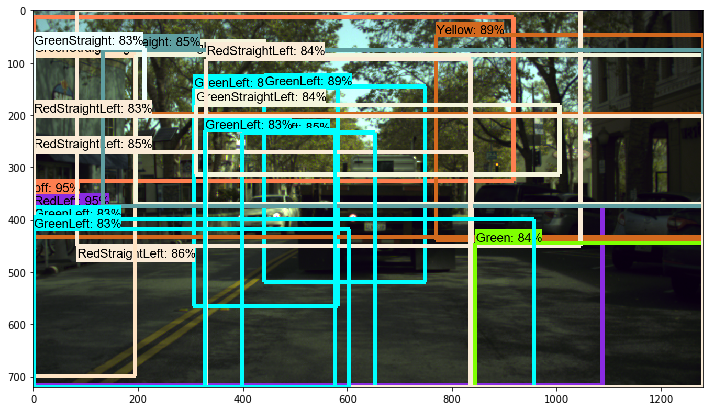

SCORES
[[0.9814015  0.97596073 0.9495452  0.9352928  0.93128806 0.9203633
  0.9192746  0.91873085 0.9139789  0.9046125  0.8915697  0.88744974
  0.8864659  0.8782299  0.8736793  0.87257737 0.86953974 0.86925185
  0.8657351  0.86549217 0.86264795 0.8609157  0.8599311  0.85893524
  0.85810393 0.8572479  0.85368955 0.8531299  0.8516821  0.85099643
  0.842848   0.84147644 0.8381097  0.83613694 0.8361366  0.83556306
  0.8349051  0.83377767 0.83090305 0.82502675 0.8237836  0.82355076
  0.8230448  0.82275844 0.8206434  0.81973493 0.8176983  0.81673473
  0.81528306 0.8151641  0.8130368  0.81252474 0.8115301  0.8102793
  0.8096794  0.80945665 0.8090782  0.80898225 0.8071632  0.80686474
  0.80448383 0.80360764 0.8028498  0.80257833 0.8016117  0.8003957
  0.8000169  0.7995792  0.79891855 0.7979884  0.7974602  0.7973657
  0.796847   0.7966227  0.79620063 0.795564   0.7952704  0.7944299
  0.7939263  0.7936918  0.7935099  0.7929399  0.7926644  0.79245067
  0.79173934 0.79167867 0.789773   0.7893921  

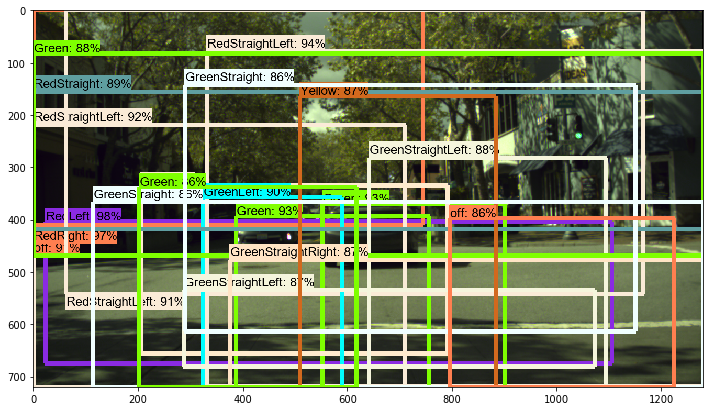

SCORES
[[0.9647552  0.9392222  0.9249869  0.9212289  0.9164394  0.91334987
  0.90959984 0.90287614 0.9015237  0.89679015 0.8959099  0.89302874
  0.89301807 0.8885201  0.8827285  0.88242495 0.88088113 0.8808404
  0.8706189  0.8698447  0.86828846 0.8648426  0.8643056  0.86429054
  0.8630135  0.86279386 0.86187446 0.8611712  0.8607087  0.8600737
  0.8574943  0.8573604  0.85715157 0.8567287  0.85502905 0.85471684
  0.85403985 0.8527772  0.8513794  0.8509883  0.85011065 0.8499611
  0.84983075 0.8491847  0.84776855 0.8459134  0.84507257 0.8448426
  0.8444932  0.84432244 0.8437561  0.8420915  0.8420657  0.8379451
  0.8368138  0.8360175  0.83567894 0.8336802  0.8335222  0.83266574
  0.8326151  0.83073395 0.8299488  0.8284551  0.8282622  0.8281823
  0.8264568  0.825954   0.82329315 0.82296693 0.82269156 0.8218752
  0.82094425 0.8207928  0.82064253 0.81976783 0.8186479  0.8185597
  0.8177249  0.8170818  0.8166986  0.81626767 0.81562644 0.8154204
  0.8147477  0.8145904  0.8139286  0.81336284 0.81

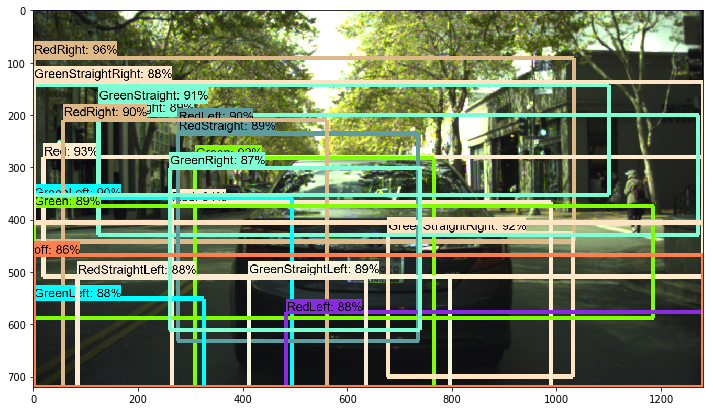

SCORES
[[0.96856505 0.9633283  0.93208516 0.93104136 0.9285646  0.9209446
  0.90916854 0.90766215 0.906476   0.9050033  0.8993253  0.89843744
  0.89535093 0.88240147 0.8747817  0.87324136 0.87116915 0.8704619
  0.8686262  0.86391735 0.86213493 0.86176467 0.8563156  0.8561918
  0.85495836 0.85074735 0.85019976 0.8500915  0.8496982  0.8496693
  0.84961677 0.84942114 0.84727585 0.846623   0.845767   0.8435517
  0.8420468  0.8394418  0.83799314 0.83511764 0.83500123 0.8349769
  0.8349114  0.8328776  0.8327324  0.83209765 0.8314562  0.8313045
  0.82970005 0.82846856 0.82782334 0.8278112  0.82643837 0.82596946
  0.8235859  0.8233699  0.8228105  0.82278734 0.8227872  0.8220072
  0.82197756 0.8205983  0.82053584 0.81843334 0.8179078  0.8174112
  0.8170448  0.8168491  0.8161826  0.8140753  0.8133315  0.81324464
  0.8129228  0.8126676  0.81224746 0.8115638  0.8113447  0.8098558
  0.8078028  0.80770576 0.80765784 0.80683535 0.805949   0.80584717
  0.8056684  0.8051857  0.8051396  0.8044064  0.803

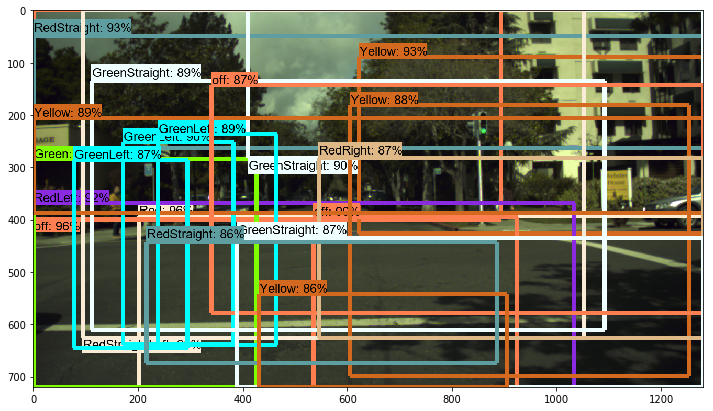

SCORES
[[0.94751465 0.89801246 0.89686656 0.89399976 0.8704584  0.8501478
  0.84750295 0.8444654  0.84335464 0.8428658  0.8420247  0.8399408
  0.8369194  0.8366791  0.8354784  0.8329533  0.83168095 0.82529753
  0.82238513 0.82106584 0.8184482  0.81817067 0.8173841  0.81731266
  0.8169005  0.81625366 0.8153879  0.8148836  0.81302696 0.8126178
  0.8097966  0.80886096 0.80818737 0.80655724 0.8052989  0.8045629
  0.80187184 0.80143374 0.8009719  0.80041933 0.7983327  0.7978294
  0.79769444 0.7962046  0.79530156 0.79510754 0.79434806 0.7933886
  0.7931972  0.79171574 0.7914737  0.79129577 0.79043734 0.789141
  0.7885764  0.7883479  0.78824884 0.7882262  0.7882022  0.7878886
  0.7877782  0.78745997 0.7869745  0.78659046 0.78655016 0.7843046
  0.7836591  0.78337336 0.7833658  0.7833388  0.7831368  0.78263104
  0.78229994 0.7822181  0.7805667  0.780241   0.7798167  0.77907586
  0.7789447  0.7786214  0.7783899  0.77805144 0.77761245 0.77692527
  0.77672815 0.7764724  0.7759549  0.7754415  0.775

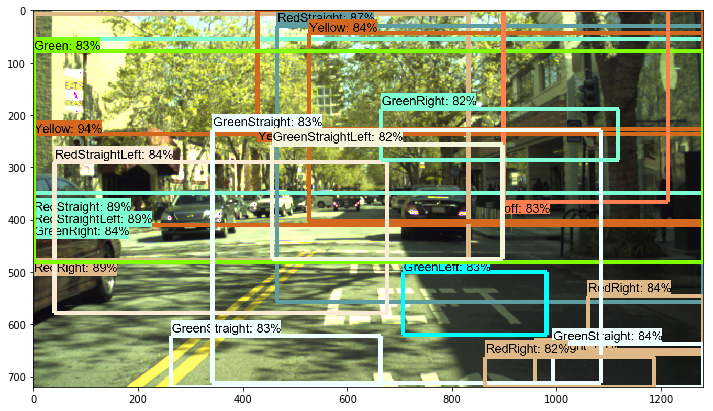

SCORES
[[0.92534107 0.900653   0.89860713 0.8952231  0.8869633  0.88411355
  0.8822111  0.8802922  0.8519491  0.8502779  0.84891224 0.84792084
  0.8460751  0.83910054 0.8364284  0.83631897 0.8348618  0.8335237
  0.8334248  0.8332463  0.83287567 0.83043194 0.8255462  0.8253003
  0.82513654 0.824856   0.8242789  0.823852   0.8227847  0.82041013
  0.8200668  0.8170531  0.8157041  0.81521803 0.812967   0.81277937
  0.8094642  0.80778587 0.80773765 0.80751973 0.8067671  0.805276
  0.8049365  0.8046739  0.80191374 0.8017289  0.79966724 0.7989412
  0.79865354 0.7986017  0.79824406 0.797322   0.79584867 0.7942992
  0.7940859  0.7938835  0.793722   0.7929475  0.7928111  0.7902165
  0.7876828  0.78723353 0.7871949  0.78719175 0.78535575 0.78506535
  0.78498936 0.7841771  0.7838279  0.7834891  0.78334635 0.782538
  0.7807244  0.7806499  0.7804992  0.7799956  0.7798304  0.7798004
  0.7797588  0.7790639  0.77867335 0.77855194 0.7784261  0.77813643
  0.77756184 0.7774549  0.77661467 0.7763084  0.774

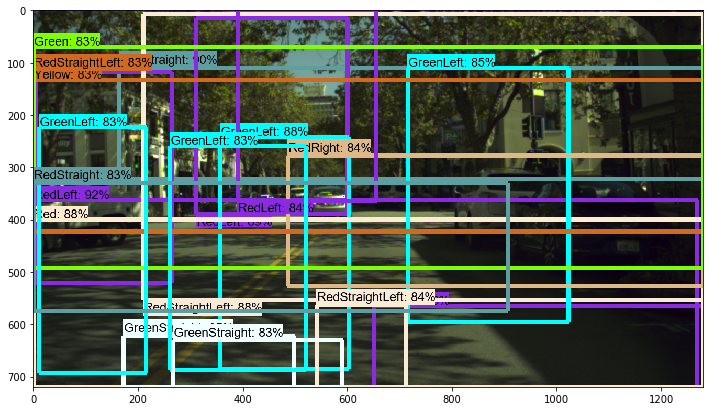

SCORES
[[0.95269984 0.94093543 0.9394967  0.9183995  0.91631657 0.9161721
  0.9154124  0.912855   0.9097338  0.89989597 0.8986804  0.897419
  0.8955049  0.8926482  0.8907482  0.8878691  0.88407195 0.88255996
  0.8811959  0.87982565 0.87565076 0.87265885 0.8710218  0.8688917
  0.86257964 0.8621279  0.86194986 0.8599945  0.8597848  0.85864574
  0.85835016 0.8582193  0.85720545 0.8554295  0.8551321  0.85488975
  0.85467535 0.853666   0.8532664  0.852418   0.85206735 0.8518973
  0.8494737  0.8473216  0.8471529  0.84714717 0.84435475 0.8415812
  0.8408697  0.8401972  0.8398046  0.83886313 0.83824956 0.83662486
  0.83241475 0.8313482  0.83024436 0.8298694  0.82978994 0.8293217
  0.82725817 0.8261143  0.8257458  0.824235   0.8236239  0.822836
  0.82256246 0.8200384  0.8178561  0.8173905  0.8171283  0.81701744
  0.8163522  0.81601363 0.8152272  0.8147644  0.8147581  0.8145991
  0.8142218  0.81406724 0.81366724 0.8136512  0.8129282  0.81212616
  0.8107839  0.810387   0.8102023  0.8095915  0.808

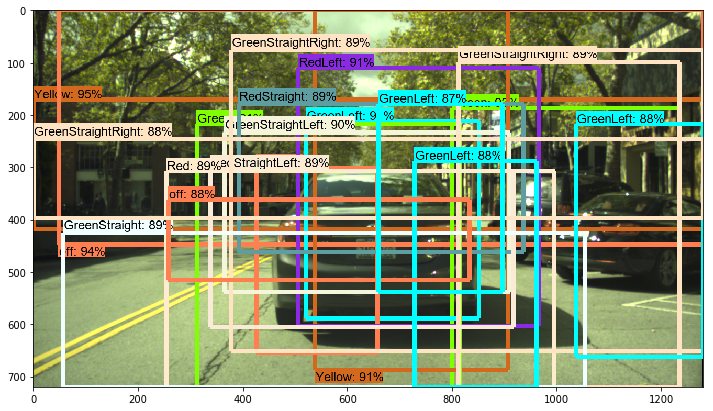

SCORES
[[0.9479179  0.9424859  0.9118401  0.9008938  0.8945556  0.8941476
  0.89216024 0.88919663 0.88875365 0.88470143 0.88424426 0.88154006
  0.8782551  0.8775613  0.87635475 0.87467515 0.87218106 0.86948204
  0.8679308  0.8661946  0.86444813 0.8642319  0.86287016 0.8604208
  0.8547297  0.8546345  0.85185707 0.8503247  0.84785235 0.84684074
  0.842606   0.84213585 0.8397448  0.83687943 0.8364544  0.83627415
  0.83583844 0.833595   0.83264095 0.8315894  0.8306698  0.82869494
  0.82818335 0.82757276 0.82690525 0.8263838  0.8255017  0.8233452
  0.82255095 0.8216594  0.8211382  0.8188622  0.8183952  0.81668
  0.8166254  0.8165375  0.8157821  0.814915   0.8139795  0.8107835
  0.8107532  0.8100678  0.8095143  0.8089444  0.80854106 0.80842507
  0.8084216  0.8066353  0.8064284  0.8064187  0.8041143  0.802395
  0.8018905  0.8011626  0.8009297  0.800821   0.8006401  0.8005556
  0.7987607  0.79804844 0.79691344 0.7963682  0.79622537 0.79609823
  0.79528385 0.79515874 0.79474026 0.794329   0.794

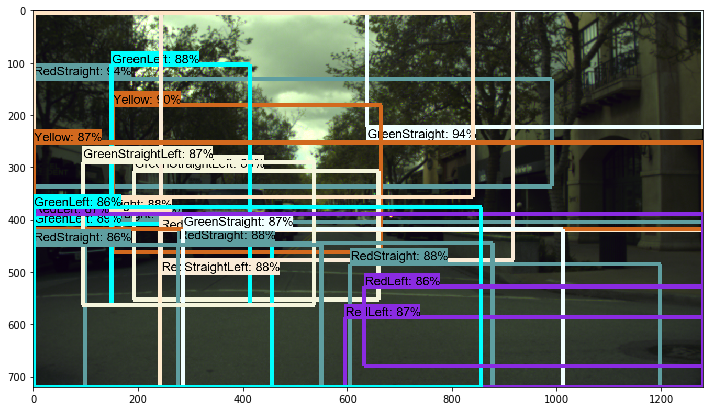

SCORES
[[0.9576095  0.9256734  0.91667473 0.9078804  0.8970809  0.89129055
  0.880912   0.8805977  0.86990887 0.86648977 0.8655319  0.863163
  0.8588407  0.8572016  0.8538793  0.8516599  0.8508171  0.8506774
  0.8500985  0.84823287 0.8446689  0.8401554  0.83713555 0.83625954
  0.83327115 0.8317946  0.8317702  0.8284571  0.8278449  0.82781917
  0.82722217 0.8241683  0.82402086 0.8236216  0.8233774  0.82283944
  0.8210442  0.81966907 0.81579345 0.8131596  0.8122527  0.811813
  0.8117772  0.81163806 0.8115584  0.80944467 0.80894494 0.8086596
  0.8072502  0.8061189  0.8046685  0.80383223 0.80378664 0.8033657
  0.8028796  0.80213886 0.80087453 0.8004428  0.7998834  0.7988333
  0.79878616 0.7987527  0.79817516 0.79662    0.7961036  0.7954459
  0.7953434  0.79522383 0.79439527 0.7942132  0.7936912  0.7920559
  0.79169846 0.7910891  0.7907885  0.7907308  0.7900626  0.78955245
  0.7890563  0.78738517 0.78593284 0.7858765  0.78546304 0.78533137
  0.78528845 0.7852403  0.78519714 0.7851577  0.785

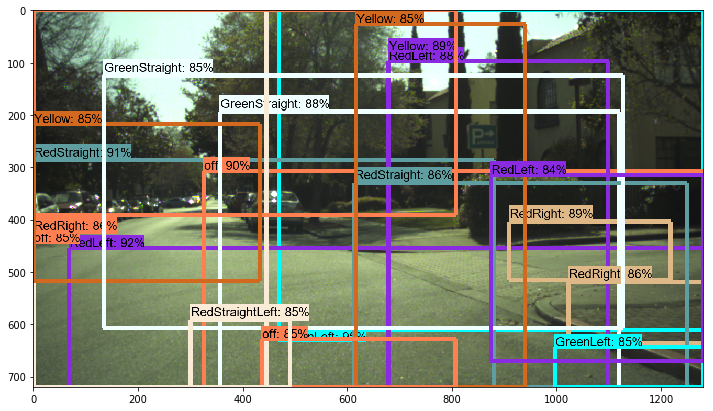

SCORES
[[0.96234715 0.93596154 0.8958862  0.89319825 0.8869045  0.8745682
  0.86734647 0.8610104  0.8570682  0.8559601  0.8538588  0.85361296
  0.84878093 0.8469645  0.8447662  0.8396082  0.8394124  0.83351433
  0.83094275 0.83051586 0.8289019  0.8281875  0.8279102  0.82751036
  0.826506   0.82375044 0.82249033 0.8220965  0.8210303  0.8204112
  0.8198853  0.8189994  0.8179039  0.81684613 0.8160471  0.8155926
  0.8146227  0.81375664 0.81349486 0.81330585 0.8130476  0.81221765
  0.8120856  0.810351   0.8102611  0.8095107  0.80864716 0.8080667
  0.8080285  0.8075003  0.8058016  0.804565   0.80433285 0.8041455
  0.80292845 0.80195713 0.8014839  0.80066293 0.8006077  0.79966825
  0.7992609  0.79855525 0.7983559  0.79819053 0.79727936 0.79726326
  0.79710597 0.79599005 0.7942029  0.7937044  0.7936122  0.79348457
  0.79332256 0.79258585 0.79220873 0.791843   0.7918385  0.7917218
  0.79160815 0.7906371  0.790382   0.7900764  0.78990465 0.7898309
  0.78930247 0.78926975 0.78925204 0.7885947  0.

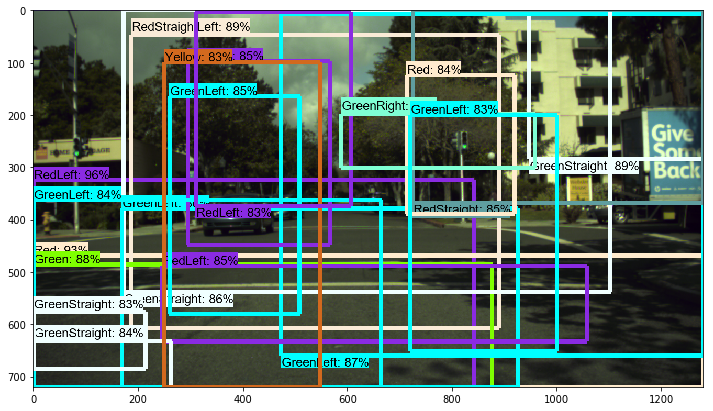

In [7]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores)
            print('CLASSES')
            print(classes)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break